In [23]:

%matplotlib notebook
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as pyplot
import numpy.random as random
import sounddevice as sd

N:  109
b :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
a :  [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -1. -1.]


<IPython.core.display.Javascript object>


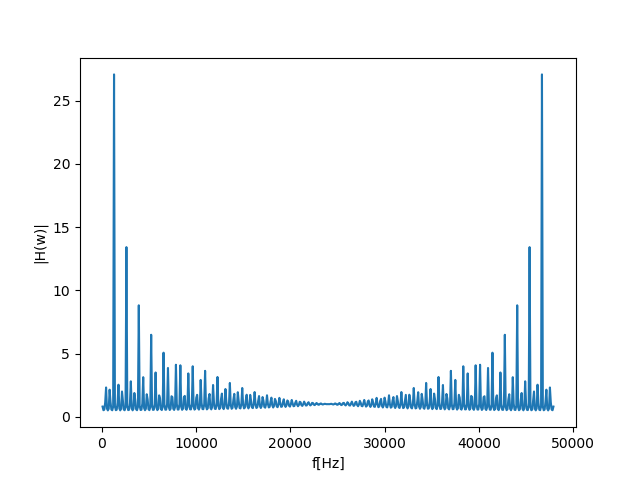

<IPython.core.display.Javascript object>


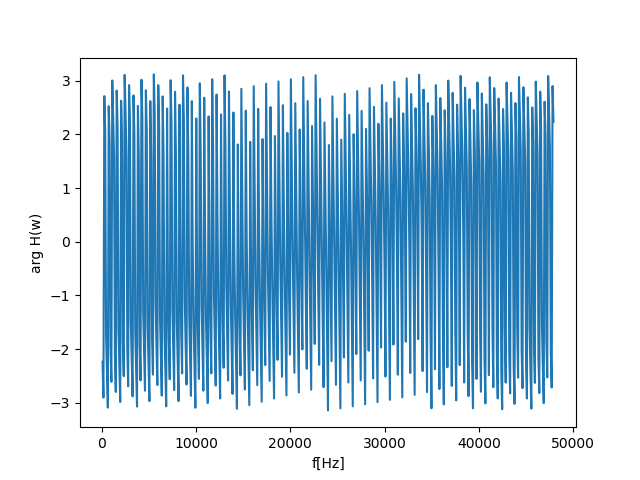

In [58]:
# 2 Tacka

f = 440
FS = 48000
N = round(FS / f - 0.5)
print("N: ", N)
b = np.zeros(N + 1)
b[N] = 2
print("b : ", b)
a = np.zeros(N + 2)
(a[0], a[N], a[N + 1]) = (2, -1, -1)
print("a : ", a)
(w, H) = signal.freqz(b, a, 512, True)
pyplot.figure()
pyplot.xlabel("f[Hz]")
pyplot.ylabel("|H(w)|")
freqAxis = (w * FS) / (2 * np.pi)
pyplot.plot(freqAxis, np.abs(H))
pyplot.figure()
pyplot.xlabel("f[Hz]")
pyplot.ylabel("arg H(w)")
pyplot.plot(freqAxis, np.angle(H))

In [79]:
# Tacka 3
def karplusStrong(f, fs, l):
    N = round((fs / f - 0.5))
    (b, a) = (np.zeros(N + 1), np.zeros(N + 2))
    (b[N], a[0], a[N], a[N + 1]) = (2, 2, -1, -1)
    noise = random.normal(0, 1, N)
    input = np.concatenate((noise, np.zeros(l * fs - N)))
    result = signal.lfilter(b, a, input)
    normalized = (result / np.amax(np.abs(result)))
    return normalized

Noise size:  109
Input size:  48000
[-1.1674388  -0.09777989  0.4228966  ...  0.          0.
  0.        ]
[ 0.          0.          0.         ... -0.34108896 -0.31276872
 -0.28313731]
48000
[ 0.          0.          0.         ... -0.1208261  -0.11079405
 -0.10029752]


<IPython.core.display.Javascript object>


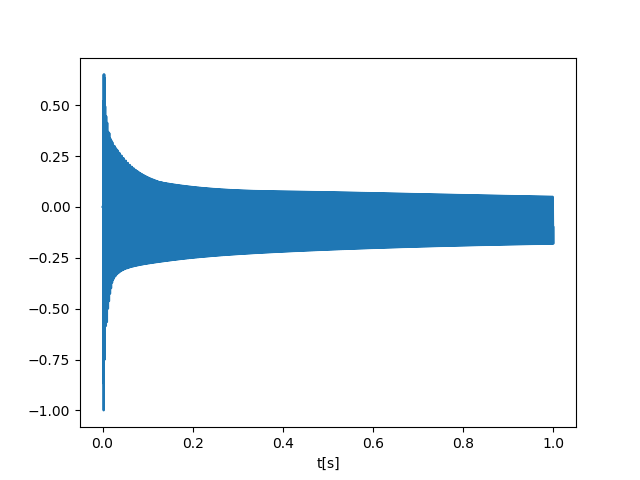

In [100]:
# Tacka 4
l = 1
FS = 48000
synth = karplusStrong(440, FS, l)
sd.play(result, 48000)
t = np.linspace(0, l, l * FS)
pyplot.figure()
pyplot.xlabel("t[s]")
pyplot.plot(t, synth)